In [1]:
from PIL import Image
from skimage import color as skco
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Fig. 1. Peas On Desk')

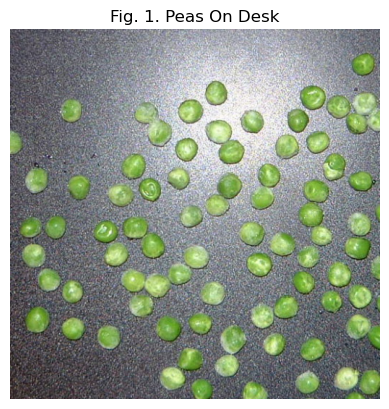

In [ ]:
# Load the image
p_image = Image.open('croppedpeasondesk.jpg')
plt.imshow(p_image)
plt.axis('off')
plt.title('Fig. 1. Peas On Desk')

Colour of peas quite different from desk, therefore can try to use intensity based segmentation. 

/opt/anaconda3/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: divide by zero encountered in matmul
  return rgb @ coeffs
/opt/anaconda3/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: overflow encountered in matmul
  return rgb @ coeffs
/opt/anaconda3/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: invalid value encountered in matmul
  return rgb @ coeffs


Text(0.5, 1.0, 'Fig. 2. Peas on Desk (intensity)')

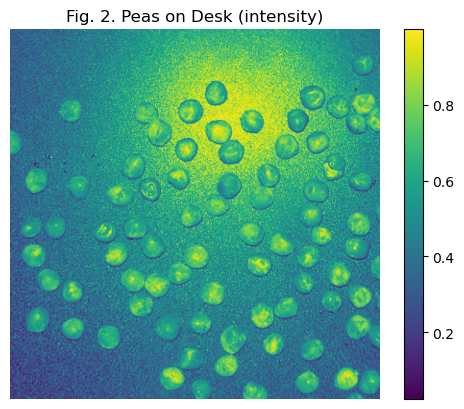

In [4]:
# Generate histogram of achromatic intensity
na = np.array(p_image)
gr_im = skco.rgb2gray(na)
plt.imshow(gr_im)
plt.axis('off')
plt.colorbar()
plt.title('Fig. 2. Peas on Desk (intensity)')

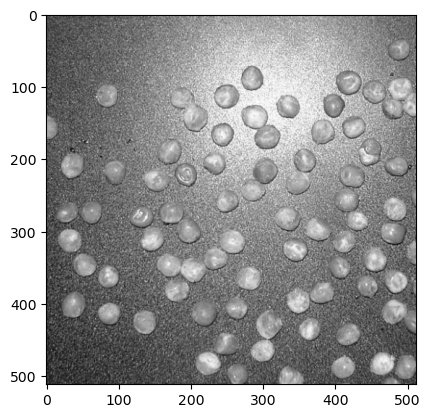

In [5]:
# display greyscale 
grey_map=plt.get_cmap('gray')
plt.imshow(gr_im, cmap=grey_map, interpolation=None)

Looking at this, realised intensity based may not work cuz of the area with very bright reflection. So, plot histogram of the pixel values

In [6]:
min_intensity = np.min(gr_im)
max_intensity = np.max(gr_im)
print('Min:', min_intensity, ', Max:', max_intensity)

Min: 0.02382705882352941 , Max: 0.9991666666666668


Text(0.5, 1.0, 'Fig. 3. Histogram of intensities')

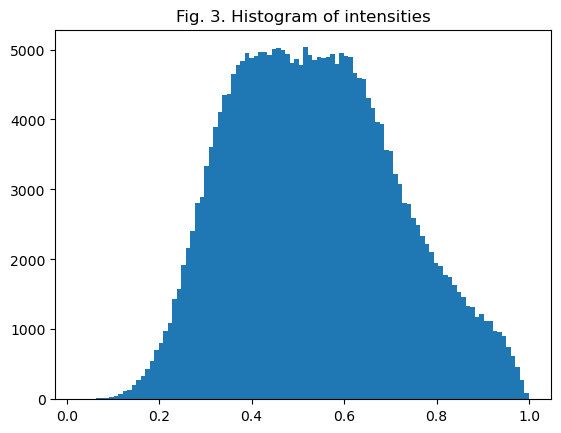

In [7]:
h, bin_edges = np.histogram(gr_im, bins=100)

# by default, plt.bar is dumb: all bars have a width 0f 0.8! Phht....
barw = bin_edges[1]-bin_edges[0] # Should be the same for all bins.

plt.bar(bin_edges[:-1], h, width=barw, align='edge') # ...set bar width properly.
plt.title('Fig. 3. Histogram of intensities')

Text(0.5, 1.0, 'Histogram of blue')

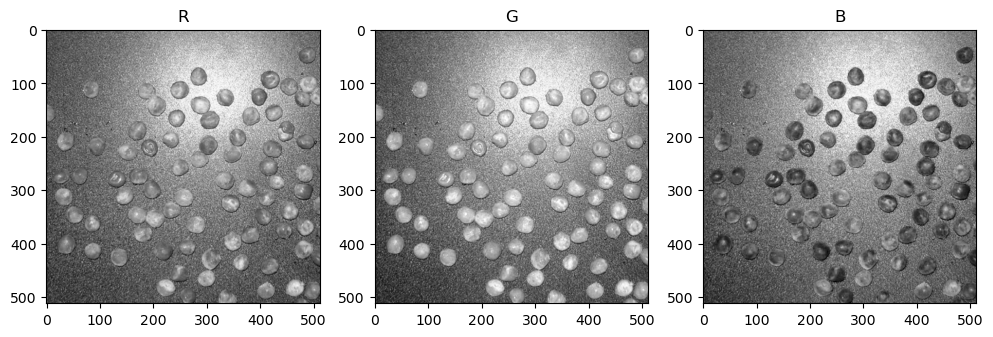

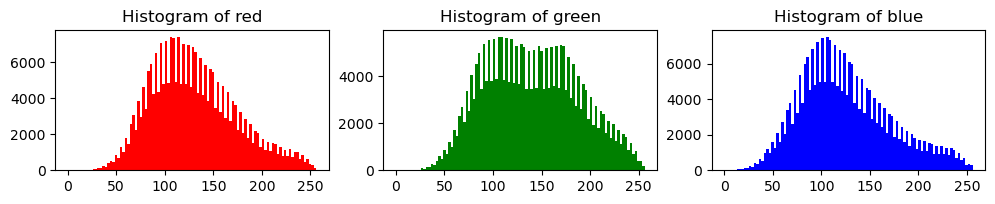

In [8]:
R = p_image.getchannel('R')
G = p_image.getchannel('G')
B = p_image.getchannel('B')

# To display the images, we can do this:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(R, cmap='gray')
plt.title('R')

plt.subplot(1,3,2)
plt.imshow(G, cmap='gray')
plt.title('G')

plt.subplot(1,3,3)
plt.imshow(B, cmap='gray')
plt.title('B')

bin_edges = np.linspace(0, 256, 101)
hr, _ = np.histogram(R, bins=bin_edges)
hg, _ = np.histogram(G, bins=bin_edges)
hb, _ = np.histogram(B, bins=bin_edges)

barw = bin_edges[1]-bin_edges[0] # the default bar width is silly

plt.figure(figsize=(12,4))
plt.subplot(2,3,4)
plt.bar(bin_edges[:-1], hr, width=barw, align='edge', color='r')     
plt.title('Histogram of red')


plt.subplot(2,3,5)
plt.bar(bin_edges[:-1], hg, width=barw, align='edge', color='g')     
plt.title('Histogram of green')


plt.subplot(2,3,6)
plt.bar(bin_edges[:-1], hb, width=barw, align='edge', color='b')     
plt.title('Histogram of blue')

Text(0.5, 1.0, 'nB')

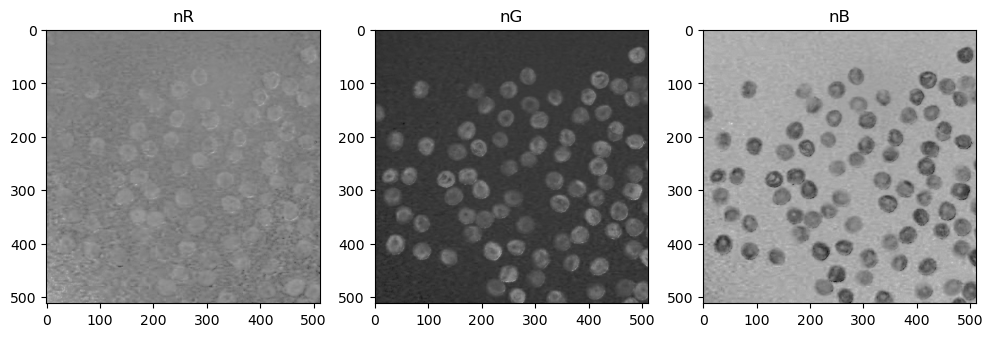

In [12]:
# Start by converting everything to floating point
fR = np.asarray(R, dtype=float)
fG = np.asarray(G, dtype=float)
fB = np.asarray(B, dtype=float)


my_eps = 0.001 # avoids divide by zero
denominator = (fR+fG+fB+my_eps)

nR = fR/denominator
nG = fG/denominator
nB = fB/denominator

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('nR')
plt.imshow(nR, cmap=grey_map)
plt.subplot(1,3,2)
plt.title('nG')
plt.imshow(nG, cmap=grey_map)
plt.subplot(1,3,3)
plt.imshow(nB, cmap=grey_map)
plt.title('nB')

Text(0.5, 1.0, 'Histogram of nB')

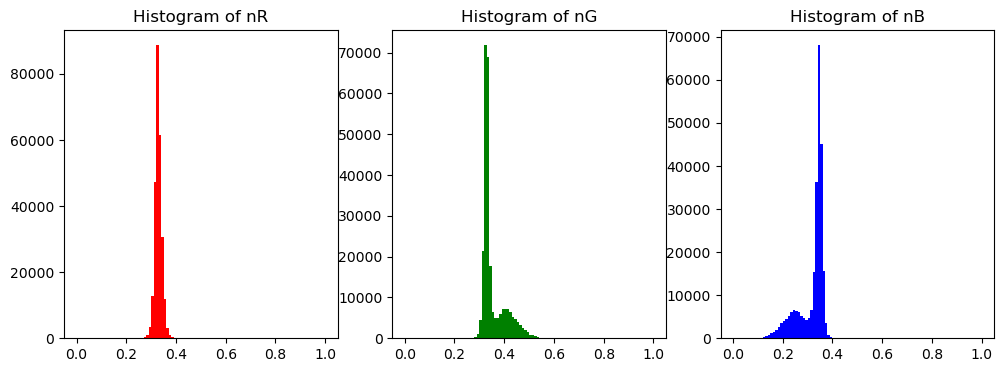

In [11]:
# Now we can generate histograms of the normalized values
bin_edges = np.linspace(0, 1, 101) 
hnR, _ = np.histogram(nR, bins=bin_edges)
hnG, _ = np.histogram(nG, bins=bin_edges)
hnB, _ = np.histogram(nB, bins=bin_edges)

barw = bin_edges[1]-bin_edges[0] 

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.bar(bin_edges[:-1], hnR, width=barw, align='edge', color='r')     
plt.title('Histogram of nR')


plt.subplot(1,3,2)
plt.bar(bin_edges[:-1], hnG, width=barw, align='edge', color='g')     
plt.title('Histogram of nG')


plt.subplot(1,3,3)
plt.bar(bin_edges[:-1], hnB, width=barw, align='edge', color='b')     
plt.title('Histogram of nB')

I can now choose which channel I want to use based on the histograms. I will create a binary image that contains pixels of value 1 if the pixel belongs to a pea, and a value of 0 if the pixel belongs to the background. I will use the nG channel.

In [13]:
P_Mask = nG > 0.37
np.shape(P_Mask)

(512, 512)

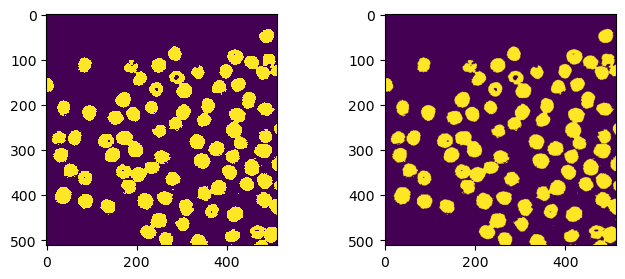

In [23]:
%matplotlib inline
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.imshow(255*P_Mask, interpolation='none')
plt.subplot(1,2,2)
plt.imshow(255*P_Mask, interpolation=None)
plt.show()

We can see that if used interpoloation='none', it prevents blurry visuals. anyway, I will now label the peas using connected components labelling. 

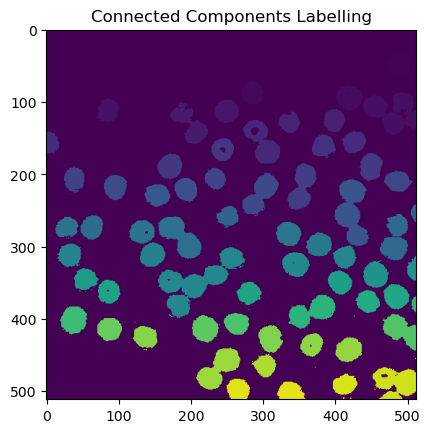

In [24]:
from matplotlib import colors
from skimage.measure import label, regionprops

P_L = label(P_Mask)
plt.imshow(P_L)
plt.title('Connected Components Labelling')
plt.show()

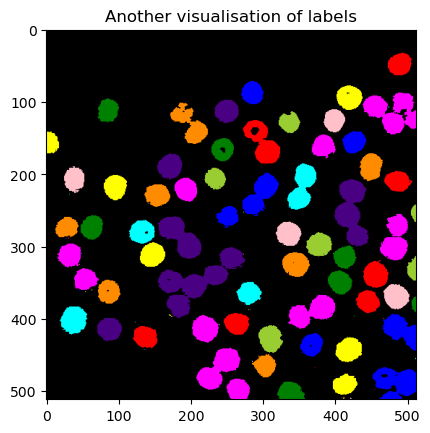

In [27]:
# experiment with different colormaps
plt.imshow(skco.label2rgb(P_L, bg_label=0))
plt.title('Another visualisation of labels')
plt.show()


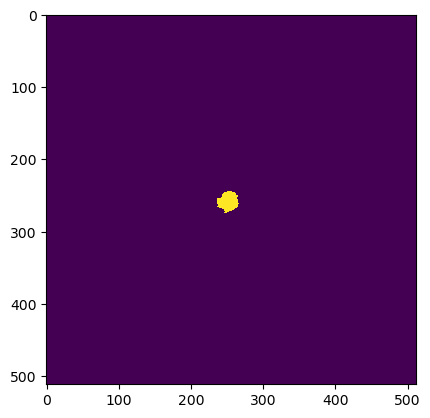

In [29]:
# try to select one individual pea
plt.imshow(P_L==32, interpolation='none')
plt.show()

very good it works. now lets count. ill be experimenting with regionprops()

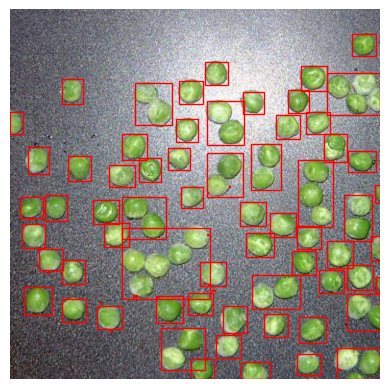

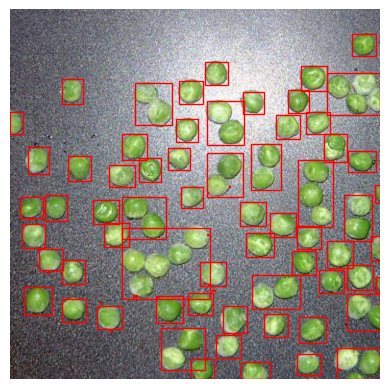

In [32]:
from skimage.measure import regionprops
Regions = regionprops(P_L)
from matplotlib.patches import Rectangle as drawrect

# Let's collect all the bounding box information to try 
# to visualise it; below, we are using List Comprehension
BBs = [thisRegion.bbox for thisRegion in Regions]

# Create a figure and return an axis object
fig, ax = plt.subplots() 

ax.imshow(p_image) # rather than plt.imhsow(), we explicitly draw it on the axis of the figure window
ax.axis('off')   

for bb in BBs:    
    r = drawrect((float(bb[1]),float(bb[0])),
                 bb[3]-bb[1],bb[2]-bb[0], 
                 edgecolor='r', facecolor='none')
    ax.add_patch(r)
plt.show()

We can see that some region contains multiple peas. I decided to go with average pea size for simplicity.

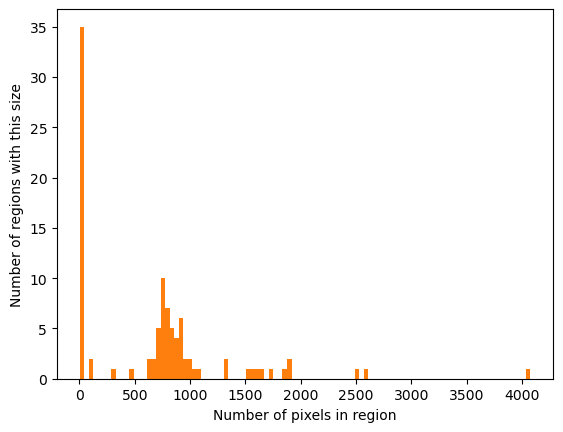

In [34]:
Areas = [thisRegion.area for thisRegion in Regions]

# I am taking the lazy option here! Compare with
# previous use of np.hist. 
HistogramOfPeaSize = plt.hist(Areas, 100) 
plt.xlabel('Number of pixels in region')
plt.ylabel('Number of regions with this size')
plt.show()

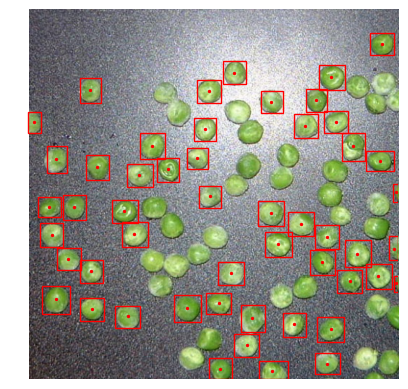

In [39]:
# using list comprehension
ValidRegions = [region for region in Regions if 
                         (region.area>50 and region.area<1200)]
Areas = [thisRegion.area for thisRegion in ValidRegions]
BBs = [thisRegion.bbox for thisRegion in ValidRegions]
Centroids = [thisRegion.centroid for 
            thisRegion in ValidRegions]
    
fig, ax = plt.subplots()
ax.imshow(p_image)
ax.axis('off')

# The zip thing is not needed, you can instead use
# enumerate and grab the corresponding indexed
# value from each list, but this is more readable...
for (bb,area,centroid) in zip(BBs,Areas,Centroids):
    r = drawrect((float(bb[1]-1),float(bb[0]-1)),
        bb[3]-bb[1],bb[2]-bb[0], 
        edgecolor='r', facecolor='none')
    
    ax.add_patch(r)
    plt.scatter(centroid[1]-1, centroid[0]-1, c='r', s=2)
    
plt.show()

To solidify concept of average pea, ill stack peas into an experimental stage. Ill first create a function to extract square region from an input image.


In [40]:
def getsquaregionfromimage(image, centroid, LW):
    
    # This should work, if it does not speak to a demonstrator
    image = np.asarray(p_image)
    
    # Get number of rows/columns and channels
    ImageSize = np.shape(image)
    
    NRows = ImageSize[0]
    NCols = ImageSize[1]
    if len(ImageSize)>2: 
        NChannels = ImageSize[2]
    else:
        NChannels = 1
    
    HalfLW = float(LW)/2.0

    # Upper left coordinate
    UL = (round(centroid[0] - HalfLW), round(centroid[1] - HalfLW))
    LR = (round(centroid[0] + HalfLW), round(centroid[1] + HalfLW))
    
    # Avoid returning an array if the coordinates would take us outside
    # the image array

    if UL[0] < 0 or UL[1] < 0 or LR[0] > NRows or LR[1] > NCols:
        # region = np.asarray([], dtype=image.dtype)
        return None
    else:
        if NChannels==1:
            region = image[UL[0]:LR[0],UL[1]:LR[1]]
        else:
            # The "ellipses" argument in nparray slices a variable number of dims
            region = image[UL[0]:LR[0],UL[1]:LR[1],...]
        
    return region

<Figure size 640x480 with 0 Axes>

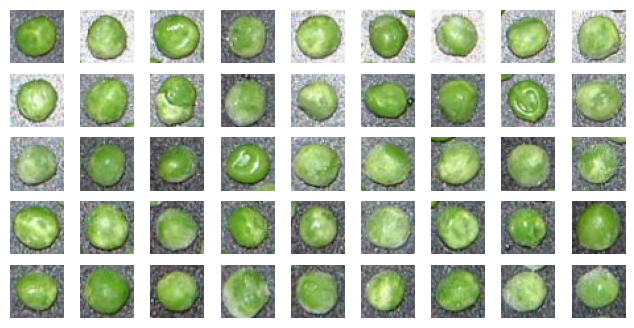

In [43]:
PeaRegionsAsList = [Region for Region 
                   in [getsquaregionfromimage(p_image, C, 41) for C 
                       in Centroids] if not (Region is None)]
PeaStack = np.concatenate([P[...,np.newaxis] for P in PeaRegionsAsList], axis=3)
    
np.shape(PeaStack)

DisplayCols=9
DisplayRows=5

fig = plt.figure()

_,axs = plt.subplots(DisplayRows,DisplayCols,figsize=(8,4))
slice_no = 0
for r in range(DisplayRows):
    for c in range(DisplayCols):
        axs[r,c].imshow(np.squeeze(np.asarray(PeaStack[...,slice_no],dtype=int)))
        axs[r,c].axis('off')
        slice_no += 1
plt.show()

Now i can compute the average pea

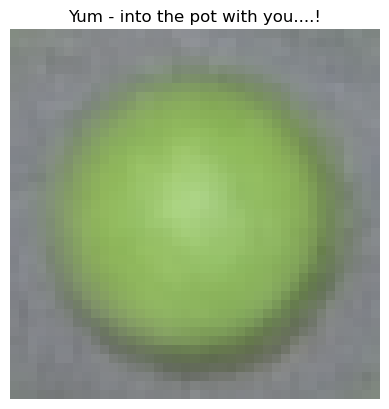

In [45]:
mPea = np.mean(PeaStack, axis=3)
plt.imshow(np.asarray(np.round(mPea), dtype=int))
plt.axis('off')
plt.title('Yum - into the pot with you....!')
plt.show()